## Recurrent Neural Networks

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### Time Series Forecasting

In [17]:
df = pd.read_csv('./data/cansim-0800020-eng-6674700030567901031.csv',
                skiprows=6, skipfooter=9, engine='python')
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [18]:
from pandas.tseries.offsets import MonthEnd

In [19]:
# add last day of the month and set index to Adjustments column
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


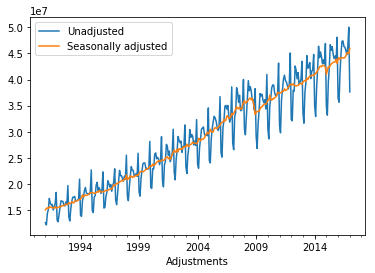

In [20]:
df.plot()

In [21]:
split_date = pd.Timestamp('01-01-2011')

In [22]:
train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

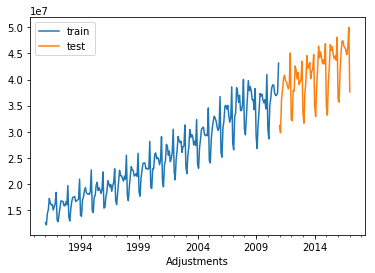

In [23]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [24]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
# do not fit test data, only transform
test_sc = sc.transform(test)

C:\Users\Philippe.Dixon\AppData\Local\Continuum\anaconda3\envs\ztdl\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [25]:
train_sc[:4]

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795]])

In [26]:
test_sc[:4]

array([[0.61423187],
       [0.56926634],
       [0.77259579],
       [0.83505683]])

In [27]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

### Fully Connected Predictor

In [30]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

In [31]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [53]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [33]:
model.fit(X_train, y_train, epochs=200, batch_size=2,
         verbose=1, callbacks=[early_stop])

Epoch 1/200
239/239 [==============================] - 1s 2ms/step - loss: 0.0899
Epoch 2/200
239/239 [==============================] - 0s 675us/step - loss: 0.0198
Epoch 3/200
239/239 [==============================] - 0s 737us/step - loss: 0.0158
Epoch 4/200
239/239 [==============================] - 0s 740us/step - loss: 0.0133
Epoch 5/200
239/239 [==============================] - 0s 744us/step - loss: 0.0117
Epoch 6/200
239/239 [==============================] - 0s 737us/step - loss: 0.0107
Epoch 7/200
239/239 [==============================] - 0s 737us/step - loss: 0.0103
Epoch 8/200
239/239 [==============================] - 0s 733us/step - loss: 0.0102
Epoch 9/200
239/239 [==============================] - 0s 756us/step - loss: 0.0101
Epoch 10/200
239/239 [==============================] - 0s 747us/step - loss: 0.0100
Epoch 11/200
239/239 [==============================] - 0s 707us/step - loss: 0.0099
Epoch 12/200
239/239 [==============================] - 0s 723us/step - loss

In [34]:
y_pred = model.predict(X_test)

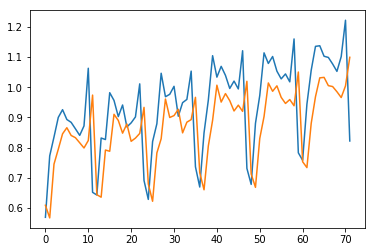

In [35]:
plt.plot(y_test)
plt.plot(y_pred)

### Recurrent Predictor

In [36]:
from keras.layers import LSTM

In [37]:
X_train.shape

(239, 1)

In [38]:
#3D tensor with shape (batch_size, timesteps, input_dim)
X_train[:, None].shape

(239, 1, 1)

In [39]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [40]:
K.clear_session()

model = Sequential()
model.add(LSTM(6, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [41]:
model.fit(X_train_t, y_train, epochs=100, batch_size=1, verbose=1,
         callbacks=[early_stop])

Epoch 1/100
239/239 [==============================] - 2s 8ms/step - loss: 0.1195
Epoch 2/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0370
Epoch 3/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0289
Epoch 4/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0231
Epoch 5/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0183
Epoch 6/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0145
Epoch 7/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0123
Epoch 8/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0110
Epoch 9/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0104
Epoch 10/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0103
Epoch 11/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0103
Epoch 12/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0103
Epoch 13/100


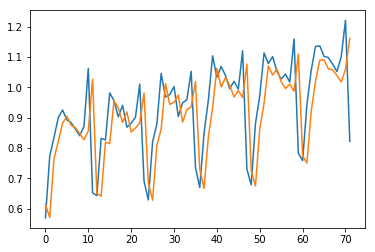

In [42]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

### Windows

In [66]:
train_sc.shape

(240, 1)

In [78]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [79]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [80]:
train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [93]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [94]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
1992-01-31,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-29,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-31,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-30,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-31,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628


In [95]:
X_train.shape

(228, 12)

In [96]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

### Fully Connected on Windows

In [97]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1,
         callbacks=[early_stop])

Epoch 1/200
228/228 [==============================] - 1s 2ms/step - loss: 0.0603
Epoch 2/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 3/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 5/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 6/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 7/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 8/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 9/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 10/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 11/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 12/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 00012: 

In [99]:
y_pred = model.predict(X_test)

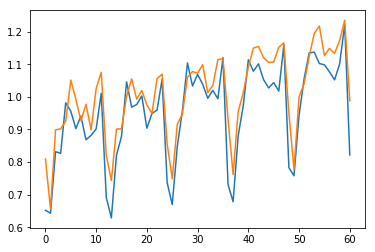

In [100]:
plt.plot(y_test)
plt.plot(y_pred)

### LSTM on Windows

In [101]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 12)
X_test_t = X_test.reshape(X_test.shape[0], 1, 12)

In [102]:
X_train_t.shape

(228, 1, 12)

In [103]:
K.clear_session()

model = Sequential()
model.add(LSTM(6, input_shape=(1, 12)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [104]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6)                 456       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.fit(X_train_t, y_train, epochs=100, batch_size=1, 
         verbose=1, callbacks=[early_stop])

Epoch 1/100
228/228 [==============================] - 2s 8ms/step - loss: 0.0214
Epoch 2/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0081
Epoch 3/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0071
Epoch 4/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0065
Epoch 5/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0056
Epoch 6/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 7/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0044
Epoch 8/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0040
Epoch 9/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0032
Epoch 10/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0032
Epoch 00010: early stopping


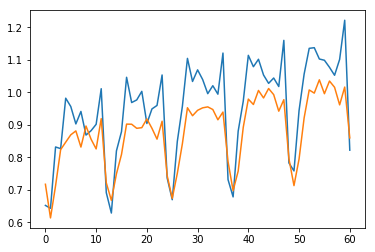

In [106]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)